In [1]:
# deal 7_PAH_zf_morphology

import numpy as np
import pandas as pd
import os, time
from scipy import stats
from matplotlib import pyplot as plt

#import generate_dose_response_old_for_more_qc_0_1 as gdr
import generate_dose_response_new_for_less_qc_0_1 as gdr

import BMD_BMDL_estimation as bmdest
import Plot_Save as ps
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/Dropbox/script/python/srpAnalytics/analysis/paritosh_original_then_edit/qc_BMD/7_PAH_zf_morphology


In [3]:
complete_file_path = '/Users/kimd999/research/projects/toxicity/data/11_11_7_PAHs/7_PAH_zf_morphology_data_2020NOV11_wide_DNC_0.csv'

morphological_data = pd.read_csv(complete_file_path, header = 0)
pd.set_option('display.max_columns', None)
display(morphological_data.head())
display(morphological_data.tail())
display(morphological_data.columns)
display(np.unique(morphological_data.well))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
1998,3859,20491,H08,3859_20491_H08,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1999,3859,20491,H09,3859_20491_H09,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,3859,20491,H10,3859_20491_H10,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,3859,20491,H11,3859_20491_H11,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,3859,20491,H12,3859_20491_H12,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index(['chemical.id', 'plate.id', 'well', 'chemical_plate_well', 'conc',
       'AXIS', 'BRN_', 'CRAN', 'DNC_', 'DP24', 'EDEM', 'LTRK', 'MO24', 'MORT',
       'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR'],
      dtype='object')

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [4]:
#np.sum(morphological_data['MO24'] == 1)

In [5]:
test_data_sim = 0
if(test_data_sim == 0):
    # Add aggregate endpoints
    # 1. Any effect at 24hrs (combination of MO24, DP24 and SM24) >> 'ANY24'
    morphological_data['ANY24'] = morphological_data[['MO24','DP24','SM24']].sum(axis=1,skipna=True,min_count=1)
    
    # 2. Any effect within 5 days (combination of all measurements at both time points)
    morphological_data['ANY120'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'EDEM', 'LTRK', 'MORT', 'MUSC', 'NC__', 'SKIN', 'TCHR', 'ANY24']].sum(axis=1,skipna=True,min_count=1)
    
    # 3. Total mortality (MO24 + MORT) >> 'TOT_MORT'
    morphological_data['TOT_MORT'] = morphological_data[['MO24','MORT']].sum(axis=1,skipna=True,min_count=1)

    # 4. Any effect except mortality (#2 minus MO24 and MORT) >> 'ALL_BUT_MORT'
    morphological_data['ALL_BUT_MORT'] = morphological_data[['AXIS', 'BRN_', 'CRAN', 'DP24', 'EDEM', \
                                                             'LTRK', 'MUSC', 'NC__', 'SKIN', 'SM24', 'TCHR']].sum(axis=1,skipna=True,min_count=1)


In [6]:
display(morphological_data.head())
morphological_data.columns

os.chdir(starting_dir)

if (os.path.isdir("report") == False):
    os.mkdir("report")
    
morphological_data_filename = os.path.join("report", 'morphological_data.csv')
morphological_data_file_out = open(morphological_data_filename, "w")
morphological_data.to_csv(morphological_data_filename, index=False)
morphological_data_file_out.close()

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR,ANY24,ANY120,TOT_MORT,ALL_BUT_MORT
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
os.chdir(starting_dir)

if (os.path.isdir("report") == False):
    os.mkdir("report")
start_time = time.time()
# Specify end_point and chemical of interest
# *********************************************
# Perform a check of the existence of "essential" column labels
# *********************************************
#end_point = 'NC24'
#chemical_id = 3005#3005#2142#1211#1595#2770#220

#test_dose_filename = os.path.join("report", 'test_dose.csv')
#test_dose_f_out = open(test_dose_filename, "w")

overall_report_filename = os.path.join("report", 'overall_report.csv')
overall_report_file = open(overall_report_filename, "w")
write_this = "chemical_id,end_point,len_test_dose_response\n"
overall_report_file.write(write_this)

qc_flag_filename = os.path.join("report", 'qc_flag.csv')
qc_flag_file_out = open(qc_flag_filename, "w")

write_this = "qc_flag\n"
qc_flag_file_out.write(write_this)

erased_morphological_data_end_point_chemical_id_filename = os.path.join("report", 'erased_morphological_data_end_point_chemical_id.txt')
erased_morphological_data_end_point_chemical_id_file = open(erased_morphological_data_end_point_chemical_id_filename, "w")
    
# full -> 17
end_points = ['ANY24','ANY120','AXIS','ALL_BUT_MORT','BRN_','CRAN','DP24','EDEM','LTRK', 'MO24','MORT','MUSC','NC__','SKIN','SM24','TCHR','TOT_MORT']

#end_points = ['ANY24']


# full 7 chemicals
for chemical_id in np.unique(morphological_data['chemical.id']):
#for chemical_id in [3756]:
    print("chemical_id:"+str(chemical_id))
    for end_point in end_points:
#        print(end_point)
        os.chdir(starting_dir)
        # subset original dataframe for a user-specified chemical and end_point pair
        morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
        
        # Binarize end-point hits (Values > 1 are forced to 1)
        end_point_hits = morphological_data_end_point_chemical_id[end_point]
        end_point_hits.loc[end_point_hits > 0] = 1
        
#        print (str(morphological_data_end_point_chemical_id))
#        morphological_data_end_point_chemical_id.to_csv('morpho.csv', index=False)

  #      f_end_point = open('end_point.txt', 'w')
 #       f_end_point.write(str(end_point))
#        f_end_point.close()
                  
        dose_response = gdr.gen_dose_response(morphological_data_end_point_chemical_id, \
                                              end_point, erased_morphological_data_end_point_chemical_id_file)
#        print ("dose_response:\n" + str(dose_response))

        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        #qc_flag = gdr.BMD_feasibility_analysis_qc_1(dose_response)
        qc_flag_file_out.write(str(qc_flag)+"\n")

        test_dose_response = gdr.reformat_dose_response(dose_response)
#        test_dose_f_out.write(str(test_dose_response))
        
        write_this = str(chemical_id) + "," + str(end_point) + "," + str(len(test_dose_response)) + "\n"
        overall_report_file.write(write_this)
    
        qc_flag_folder = "qc_" + str(qc_flag)
        if (os.path.isdir(str(qc_flag_folder)) == False):
            os.mkdir(str(qc_flag_folder))
        os.chdir(str(qc_flag_folder))

        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                #print(test_dose_response.dose[-1:])
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)

#test_dose_f_out.close()
erased_morphological_data_end_point_chemical_id_file.close()
overall_report_file.close()
qc_flag_file_out.close()
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# for all combinations (e.g. 7 chemicals x 17 endpoints, it took 100~180 seconds)
# for all combinations of 336 chemicals and 18 endpoints, 4 minutes took for qc only
# for all combinations of 336 chemicals and 18 endpoints, 104~165 minutes took for qc and bmd report

chemical_id:3756
Optimization terminated successfully.
         Current function value: 13.335029
         Iterations: 43
         Function evaluations: 83
logistic
67.38147700567855
155.5202285535082
Estimating BMDL ...
weibull
59.728511948317035
297.253849670536
Estimating BMDL ...
[ 0.0736616  -7.26440661  1.24247429]
log_logistic
59.0449668754368
346.0993589420913
Estimating BMDL ...
Optimization terminated successfully.
         Current function value: 13.327587
         Iterations: 34
         Function evaluations: 65
probit
65.38756602872664
212.67420901026426
Estimating BMDL ...
log_probit
57.65697001287192
437.64552605761804
Estimating BMDL ...
multistage_2
2.561514368670803
16.85171939144747
Estimating BMDL ...
64
64
Optimization terminated successfully.
         Current function value: 18.776686
         Iterations: 44
         Function evaluations: 85
logistic
61.067168194918175
163.35535696763625
Estimating BMDL ...
weibull
21.89580823948475
726.1084998359565
Estimating BM

qc_flag_filename:report/qc_flag.csv


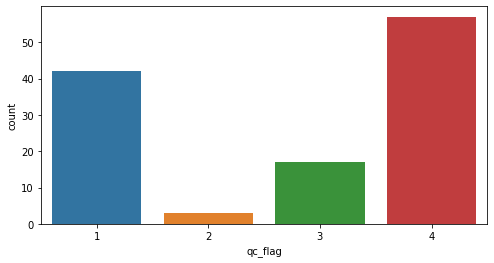

In [8]:
#'''
os.chdir(starting_dir)

print ("qc_flag_filename:"+str(qc_flag_filename))
qc_flag_data = pd.read_csv(qc_flag_filename, index_col=None)
#display(qc_flag_data.head())
ds = pd.Series({"Column": qc_flag_data["qc_flag"]})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()
#'''

In [9]:
'''
os.chdir(starting_dir)

sns.set_theme(style="whitegrid")
print ("overall_report_filename:"+str(overall_report_filename))
array_report_data = pd.read_csv(overall_report_filename, index_col=None)
display(array_report_data.head())

ds = pd.Series({"Column": array_report_data["len_test_dose_response"]})
plt.figure(figsize=(8,4))
plt.xlabel("leng")
sns.countplot(x="Column", data=ds)
plt.show()
print ("done")
'''

'\nos.chdir(starting_dir)\n\nsns.set_theme(style="whitegrid")\nprint ("overall_report_filename:"+str(overall_report_filename))\narray_report_data = pd.read_csv(overall_report_filename, index_col=None)\ndisplay(array_report_data.head())\n\nds = pd.Series({"Column": array_report_data["len_test_dose_response"]})\nplt.figure(figsize=(8,4))\nplt.xlabel("leng")\nsns.countplot(x="Column", data=ds)\nplt.show()\nprint ("done")\n'

In [10]:
test_dose_response.dose

0      0.00
1      1.00
2      2.54
3      6.45
4     16.40
5     35.00
6     74.80
7    100.00
Name: dose, dtype: float64

In [11]:
test_dose_response.dose.iloc[0]+test_dose_response.dose.iloc[1]

1.0

In [12]:
dose_response['num_affect']/dose_response['num_embryos']

0    0.032258
1    0.147059
2    0.027778
3    0.000000
4    0.138889
5    0.114286
6    0.583333
7    0.457143
dtype: float64